In [181]:
import bnlearn as bn
import matplotlib.pyplot as plt # gráficos y visualizaciones
import seaborn as sns # plt + estadisticas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions


../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloSol1Programa.csv


El dataFrame original cuenta con 76 columnas, de las cuales las mas importantes a considerar bajo el criterio de su relevancia son:

+ `exitosos`: representa el exito al resolver una pregunta, este atributo acumula la totalidad de resoluciones correctas de la guia.
+ `fallidos`: representa cuantas veces fallo en las preguntas que trato de resolver.
+ `programa`: indica al programa que pertenece.
+ `sol1`: nota final obtenida en la solemne 1.

siendo las segundas mas importantes a considerar: `las columnas de la e0 hasta la e52`, estas columnas son la representacion de la resolucion de la guia segun su preguntas, en donde, si la pregunta fue bien resuelta se le asigna un 1, su valor por defecto es 0.




In [182]:
# df = pd.read_excel(open('../resources/exitoFallidoProgramaSol.xlsx','rb'))
df = pd.read_csv("../resources/v2_hitosExitoFalloSol1Programa.csv", delimiter=";", skipinitialspace=True)
df.head()

,hito1,hito2,exitosos,fallidos,sol1,programa
0,17.0,0.0,10,21,1.0,UNAB22115
1,12.0,0.0,7,9,1.0,UNAB22115
2,11.0,0.0,6,10,1.0,UNAB22115
3,0.0,0.0,0,0,1.0,UNAB22115
4,0.0,0.0,0,0,1.0,UNAB22510


In [183]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [184]:
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'sol1', 'programa',
       'aprobado'],
      dtype='object')


Text(0.5, 1.0, 'Aprobados/Reprobados Solemne 1')

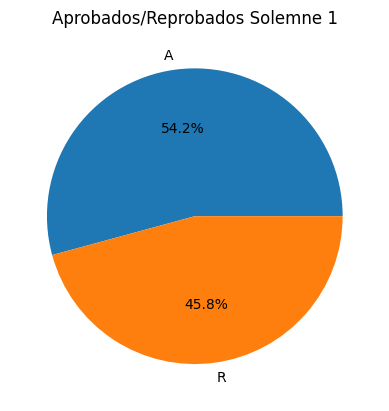

In [185]:
plt.pie(df['aprobado'].value_counts(),labels=['A','R'],autopct='%1.1f%%')
plt.title('Aprobados/Reprobados Solemne 1')


# Guardar el gráfico como imagen en la ruta especificada
# plt.savefig("E:\\dev\\tesis\\LaTeX\\img\\aprobadosReprobados.png")

In [186]:
print("Buscando el valor unico y su cardinalidad \n");
df['programa'].value_counts()

Buscando el valor unico y su cardinalidad 



UNAB12100    213
UNAB11500    185
UNAB12210    180
UNAB22115     94
UNAB21500     42
UNAB22100     41
UNAB22510     32
UNAB12510     30
UNAB21503     16
UNAB18000      2
UNAB22505      1
UNAB16507      1
UNAB35636      1
UNAB10100      1
Name: programa, dtype: int64

In [187]:
print("Porcentaje de aprobacion solemne 1 ")

print("UNAB12100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12100'].shape[0])*100))

print("UNAB11500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB11500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB11500'].shape[0])*100))

print("UNAB12210: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12210') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12210'].shape[0])*100))

print("UNAB22115: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22115') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22115'].shape[0])*100))

print("UNAB21500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21500'].shape[0])*100))

print("UNAB22100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22100'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB21503: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21503') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21503'].shape[0])*100))

print("UNAB18000: {0:.2f}%"
    .format((df[(df['programa']=='UNAB18000') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB18000'].shape[0])*100))

print("UNAB22505: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22505') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22505'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB16507: {0:.2f}%"
    .format((df[(df['programa']=='UNAB16507') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB16507'].shape[0])*100))

print("UNAB35636: {0:.2f}%"
    .format((df[(df['programa']=='UNAB35636') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB35636'].shape[0])*100))

print("UNAB10100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB10100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB10100'].shape[0])*100))

Porcentaje de aprobacion solemne 1 
UNAB12100: 28.64%
UNAB11500: 43.78%
UNAB12210: 65.56%
UNAB22115: 43.62%
UNAB21500: 38.10%
UNAB22100: 58.54%
UNAB22510: 34.38%
UNAB21503: 75.00%
UNAB18000: 0.00%
UNAB22505: 0.00%
UNAB22510: 34.38%
UNAB16507: 0.00%
UNAB35636: 100.00%
UNAB10100: 100.00%


Se realiza el aprendizaje de la estructura de una red bayesiana y luego se revisa la matriz de adyacencia de la red bayesiana aprendida.

In [214]:
# DAG = bn.structure_learning.fit(df)
# print(DAG['adjmat'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
target    hito1  hito2  exitosos  fallidos   sol1  programa  aprobado
source                                                               
hito1     False  False     False     False  False     False     False
hito2     False  False     False     False  False     False     False
exitosos  False  False     False     False  False     False     False
fallidos  False  False     False     False  False     False     False
sol1      False  False     False     False  False     False     False
programa  False  False     False     False  False     False     False
aprobado  False  False      True     False   True     False     False


Podemos imprimir el 

In [189]:
# G = bn.plot(DAG)
# print(G)

In [190]:
# # Parameter learning on the user-defined DAG and input data using Bayes
# model_bayes = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

# # Print the learned CPDs
# bn.print_CPD(model_bayes)

In [191]:
# model_mle = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')
# bn.print_CPD(model_mle)

In [192]:
# model = bn.structure_learning.fit(df)
# # Compute edge strength with the chi_square test statistic
# model = bn.independence_test(model, df)
# G = bn.plot(model)

In [193]:
# model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# model_hc_bic = bn.independence_test(model_hc_bic, df)
# G = bn.plot(model_hc_bic)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


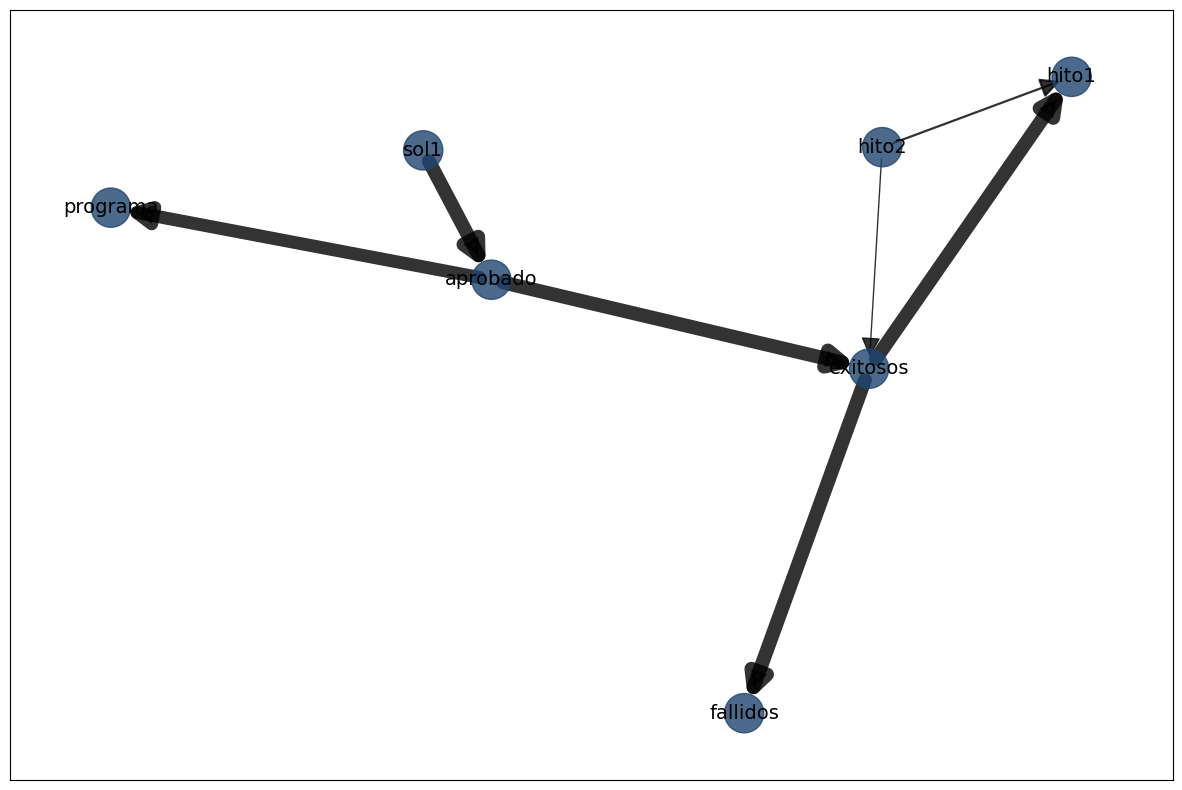

In [194]:
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_k2 = bn.independence_test(model_hc_k2, df)
G = bn.plot(model_hc_k2)

In [195]:
# Ajustar el modelo a los datos
model_update = bn.parameter_learning.fit(model_hc_k2, df)

# Realizar una predicción utilizando el modelo ajustado
prediction = bn.inference.fit(model_update, variables=['exitosos'], evidence={'aprobado': 1})

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of hito2:
+-------------+-----------+
| hito2(0.0)  | 0.518216  |
+-------------+-----------+
| hito2(2.0)  | 0.0690593 |
+-------------+-----------+
| hito2(4.0)  | 0.0685155 |
+-------------+-----------+
| hito2(6.0)  | 0.069603  |
+-------------+-----------+
| hito2(12.0) | 0.0685155 |
+-------------+-----------+
| hito2(14.0) | 0.0685155 |
+-------------+-----------+
| hito2(25.0) | 0.0685155 |
+-------------+-----------+
| hito2(32.0) | 0.0690593 |
+-------------+-----------+
[bnlearn] >CPD of hito1:
+-------------+-----+---------------------+
| exitosos    | ... | exitosos(28)        |
+-------------+-----+---------------------+
| hito2       | ... | hito2(32.0)         |
+-------------+-----+---------------------+
| hito1(0.0)  | ... | 0.02857142857142858 |
+-------------+-

In [196]:
# Acceder al modelo ajustado
model = model_update['model']

# Imprimir las variables del modelo
print(model.nodes)



['hito2', 'hito1', 'exitosos', 'fallidos', 'sol1', 'aprobado', 'programa']


In [207]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Crear un modelo bayesiano vacío
model = BayesianModel()

# Agregar nodos al modelo
model.add_nodes_from(['hito1', 'exitosos', 'aprobado'])

# Agregar arcos entre los nodos
model.add_edges_from([('hito1', 'exitosos'), ('aprobado', 'exitosos')])

# Ajustar los parámetros del modelo a los datos
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Realizar una predicción utilizando el modelo ajustado
infer = VariableElimination(model)
prediction = infer.query(variables=['exitosos'], evidence={'aprobado': 1})

In [212]:
print(prediction)

+--------------+-----------------+
| exitosos     |   phi(exitosos) |
+==============+=================+
| exitosos(0)  |          0.2061 |
+--------------+-----------------+
| exitosos(1)  |          0.0083 |
+--------------+-----------------+
| exitosos(2)  |          0.0040 |
+--------------+-----------------+
| exitosos(3)  |          0.0340 |
+--------------+-----------------+
| exitosos(4)  |          0.0268 |
+--------------+-----------------+
| exitosos(5)  |          0.0585 |
+--------------+-----------------+
| exitosos(6)  |          0.0593 |
+--------------+-----------------+
| exitosos(7)  |          0.0827 |
+--------------+-----------------+
| exitosos(8)  |          0.0617 |
+--------------+-----------------+
| exitosos(9)  |          0.0646 |
+--------------+-----------------+
| exitosos(10) |          0.0620 |
+--------------+-----------------+
| exitosos(11) |          0.0786 |
+--------------+-----------------+
| exitosos(12) |          0.0509 |
+--------------+----

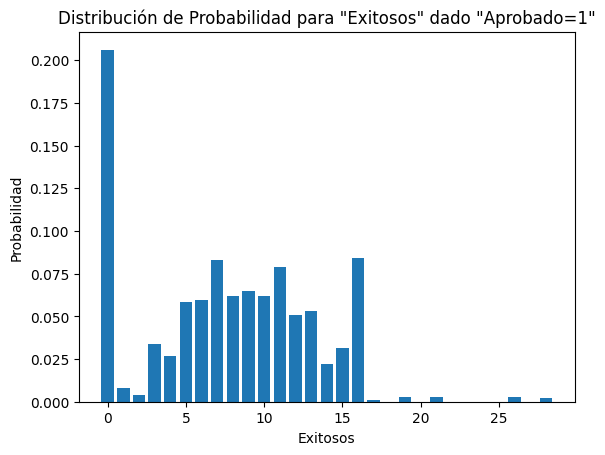

In [198]:
# Valores de la variable "exitosos"
exitosos_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 26, 28]

# Probabilidades estimadas
probabilities = [0.2061, 0.0083, 0.0040, 0.0340, 0.0268, 0.0585, 0.0593, 0.0827, 0.0617, 0.0646, 0.0620,
                 0.0786, 0.0509, 0.0529, 0.0218, 0.0317, 0.0843, 0.0011, 0.0030, 0.0025, 0.0025, 0.0023]

# Crear el gráfico de barras
plt.bar(exitosos_values, probabilities)
plt.xlabel('Exitosos')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidad para "Exitosos" dado "Aprobado=1"')

# Mostrar el gráfico
plt.show()

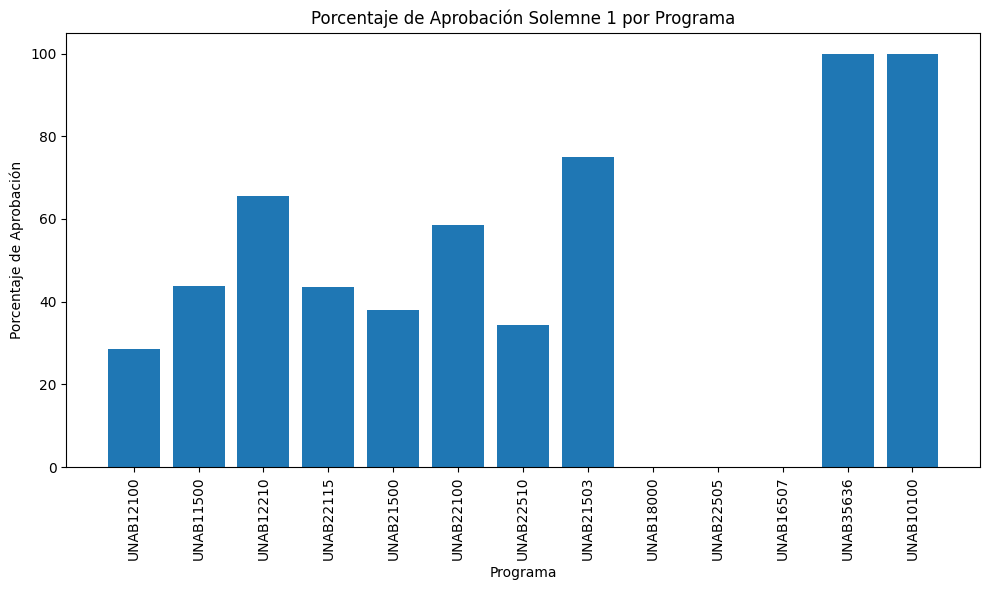

In [199]:
# Datos Programas a evaluar
programas = ['UNAB12100', 'UNAB11500', 'UNAB12210', 'UNAB22115', 'UNAB21500', 'UNAB22100', 'UNAB22510', 'UNAB21503', 'UNAB18000', 'UNAB22505', 'UNAB22510', 'UNAB16507', 'UNAB35636', 'UNAB10100']
porcentaje_aprobacion = [28.64, 43.78, 65.56, 43.62, 38.10, 58.54, 34.38, 75.00, 0.00, 0.00, 34.38, 0.00, 100.00, 100.00]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(programas, porcentaje_aprobacion)
plt.title('Porcentaje de Aprobación Solemne 1 por Programa')
plt.xlabel('Programa')
plt.ylabel('Porcentaje de Aprobación')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

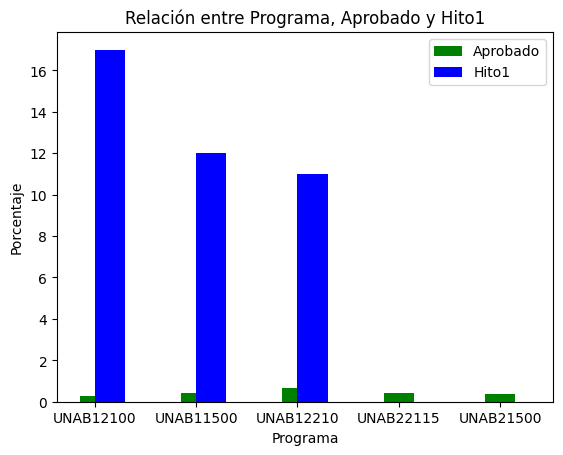

In [200]:
# Datos a evaluar
programa = ['UNAB12100', 'UNAB11500', 'UNAB12210', 'UNAB22115', 'UNAB21500']
aprobado = [0.2864, 0.4378, 0.6556, 0.4362, 0.381]
hito1 = [17.0, 12.0, 11.0, 0.0, 0.0]

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Configurar los datos y las etiquetas en los ejes x y y
x = range(len(programa))
ax.bar(x, aprobado, width=0.3, align='center', label='Aprobado', color='green')
ax.bar(x, hito1, width=0.3, align='edge', label='Hito1', color='blue')
ax.set_xticks(x)
ax.set_xticklabels(programa)
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Programa')
ax.set_title('Relación entre Programa, Aprobado y Hito1')
ax.legend()

# Mostrar la gráfica
plt.show()

In [201]:
# model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
# model_hc_bdeu = bn.independence_test(model_hc_bdeu, df)
# G = bn.plot(model_hc_bdeu)

In [202]:
# model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
# model_ex_bic = bn.independence_test(model_ex_bic, df)
# G = bn.plot(model_ex_bic)

In [203]:
# model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
# model_ex_k2 = bn.independence_test(model_ex_k2, df)
# G = bn.plot(model_ex_k2)

In [204]:
# model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
# model_ex_bdeu = bn.independence_test(model_ex_bdeu, df)
# G = bn.plot(model_ex_bdeu)

In [205]:
# model_cl = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')
# model_cl = bn.independence_test(model_cl, df)
# G = bn.plot(model_cl)

In [206]:
# model_tan     = bn.structure_learning.fit(df, methodtype='tan', root_node='Wet_Grass', class_node='Rain')
# model_tan = bn.independence_test(model_tan, df)
# G = bn.plot(model_tan)